In [71]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, \
accuracy_score , precision_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb




# Part 1: Data Analysis 

In [77]:
# Data Retrieving
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [74]:
# Descriptive Analysis
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


1    165
0    138
Name: target, dtype: int64


Text(0, 0.5, 'Count')

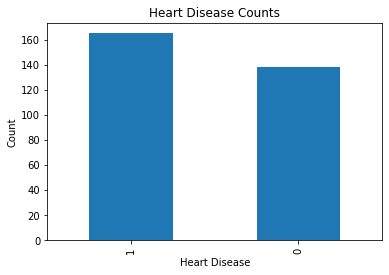

In [83]:
#Count number of being heart disease: 
print(df['target'].value_counts())
df.target.value_counts().plot(kind="bar", title = 'Heart Disease Counts')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

In [30]:
# Check for Null Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [95]:
# Check duplication
df.loc[df.duplicated() == True] 
df.shape

(303, 14)

In [159]:
df = df.drop_duplicates()

Now, the number of rows decreases from 303 to 302 since there is only 1 duplucation

In [160]:
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

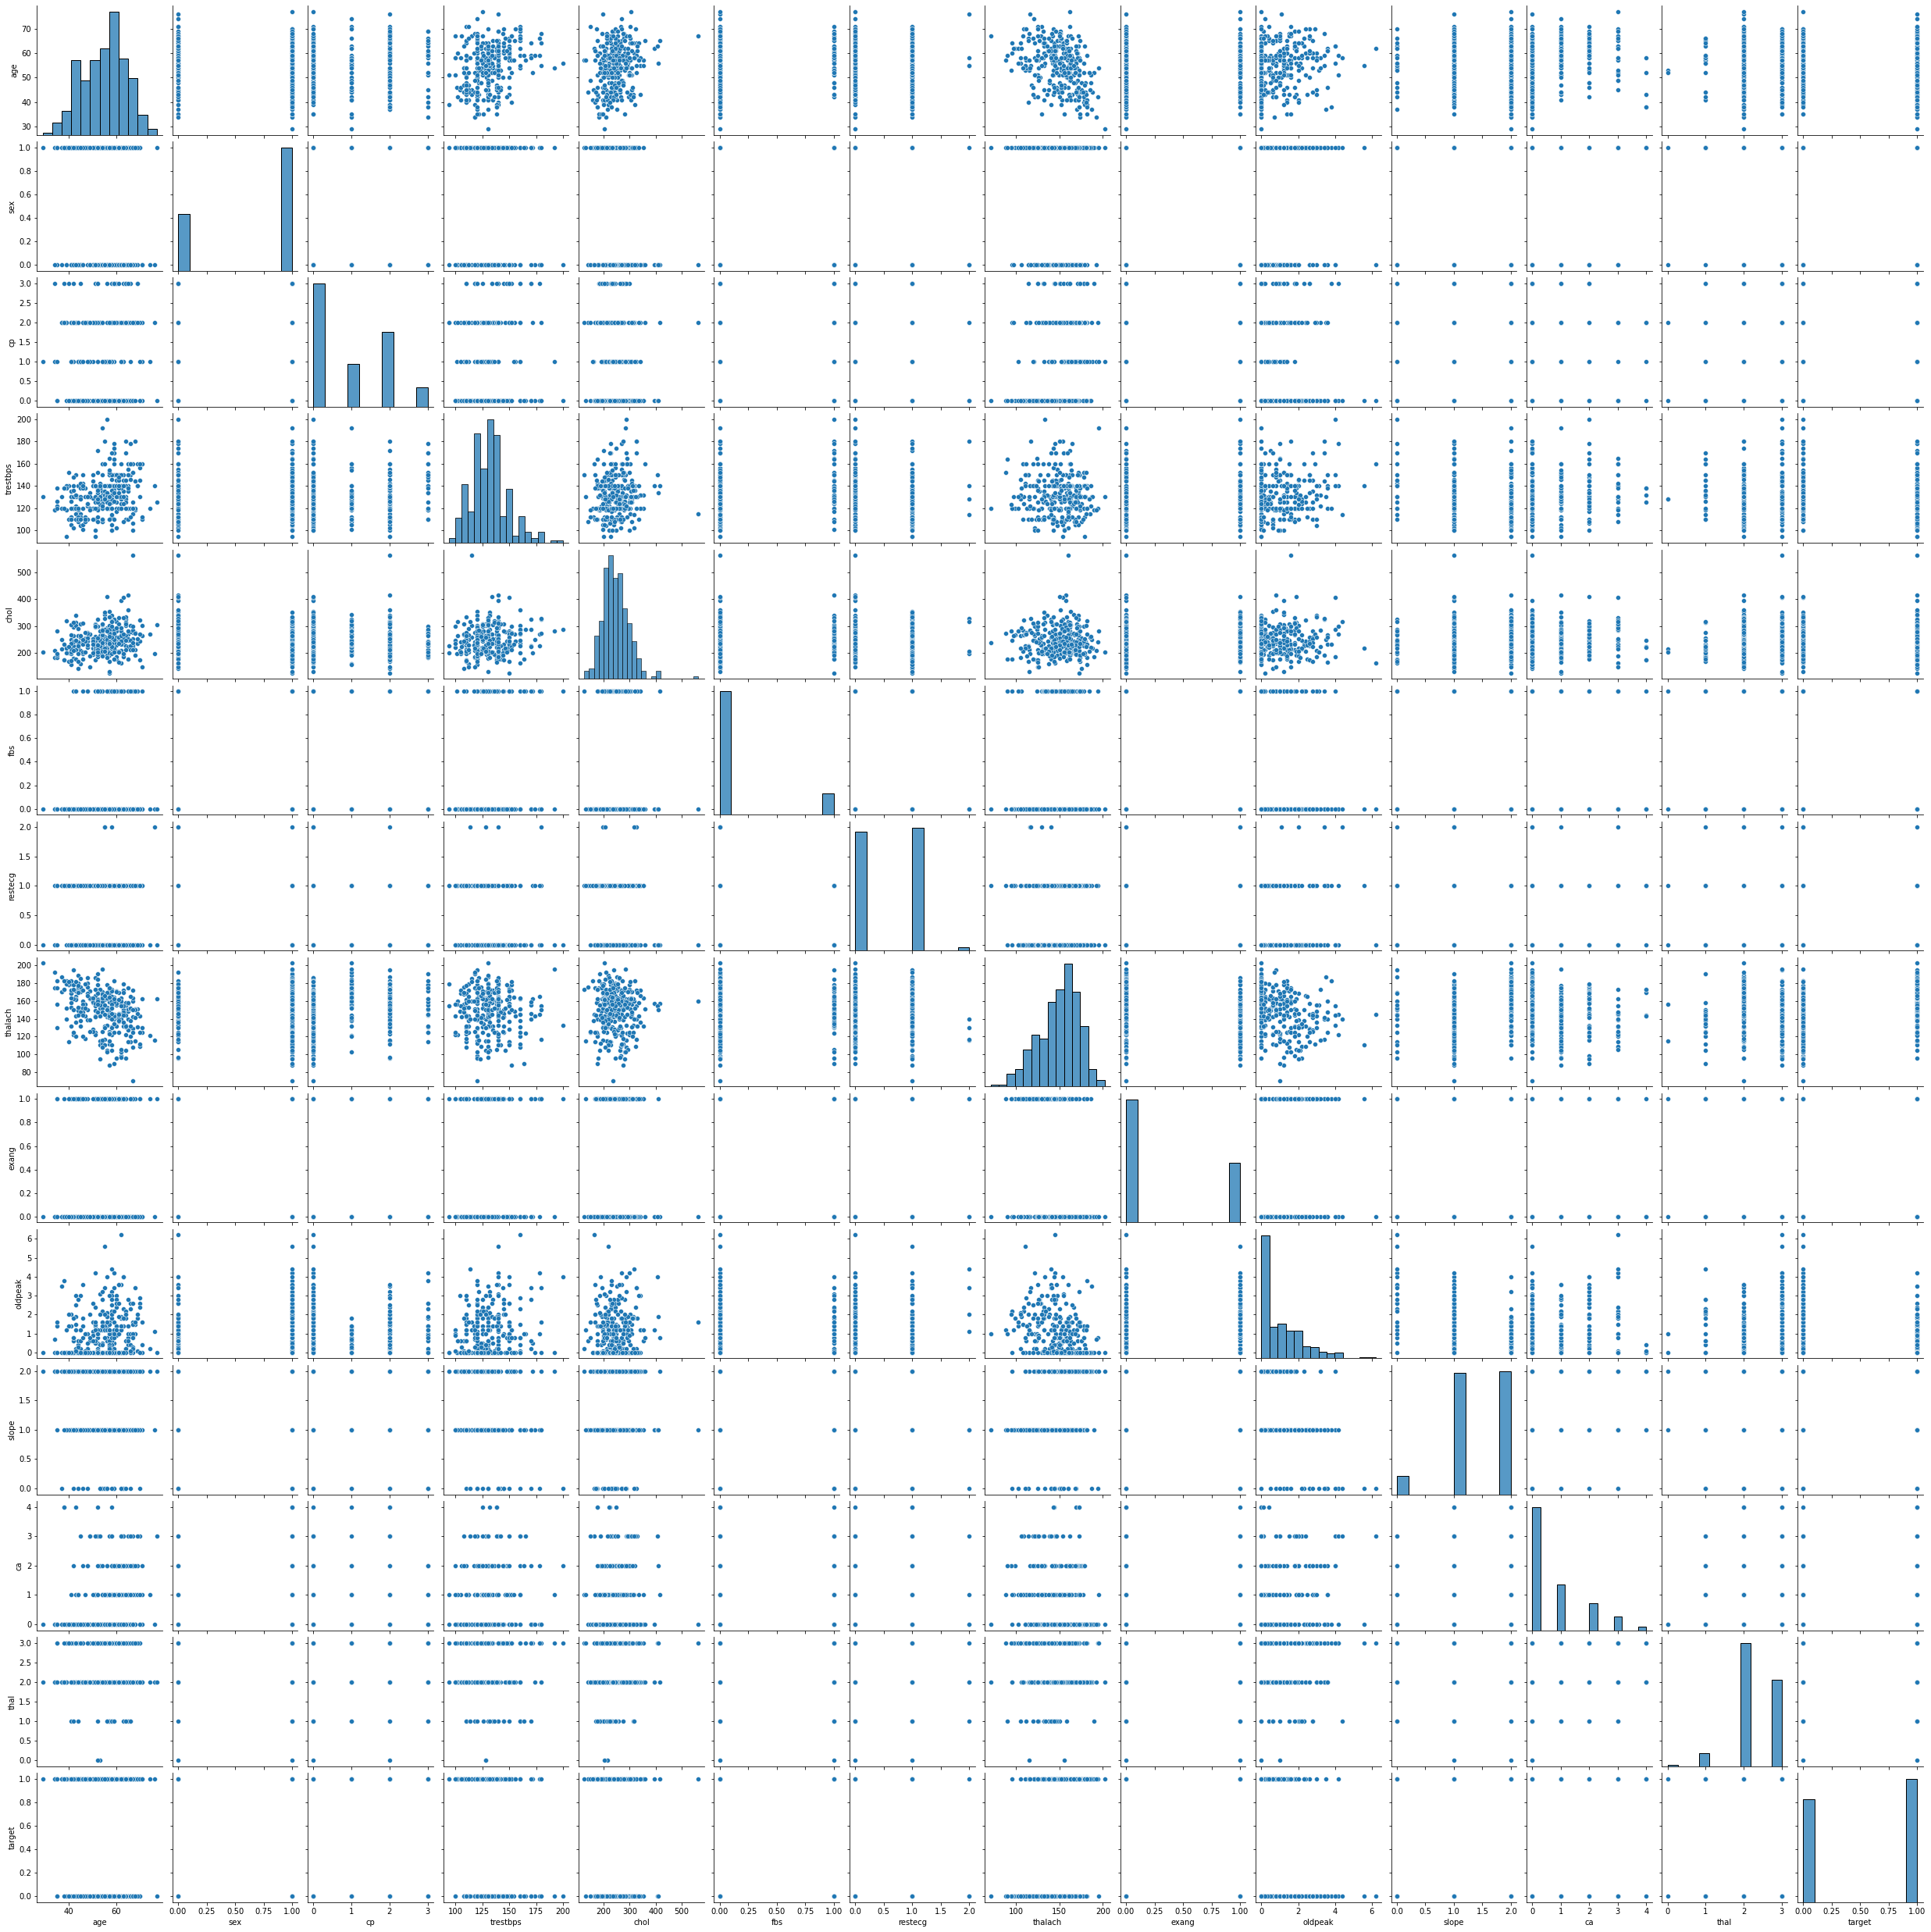

In [102]:
# Draw pairplot for all features
sns.pairplot(df)

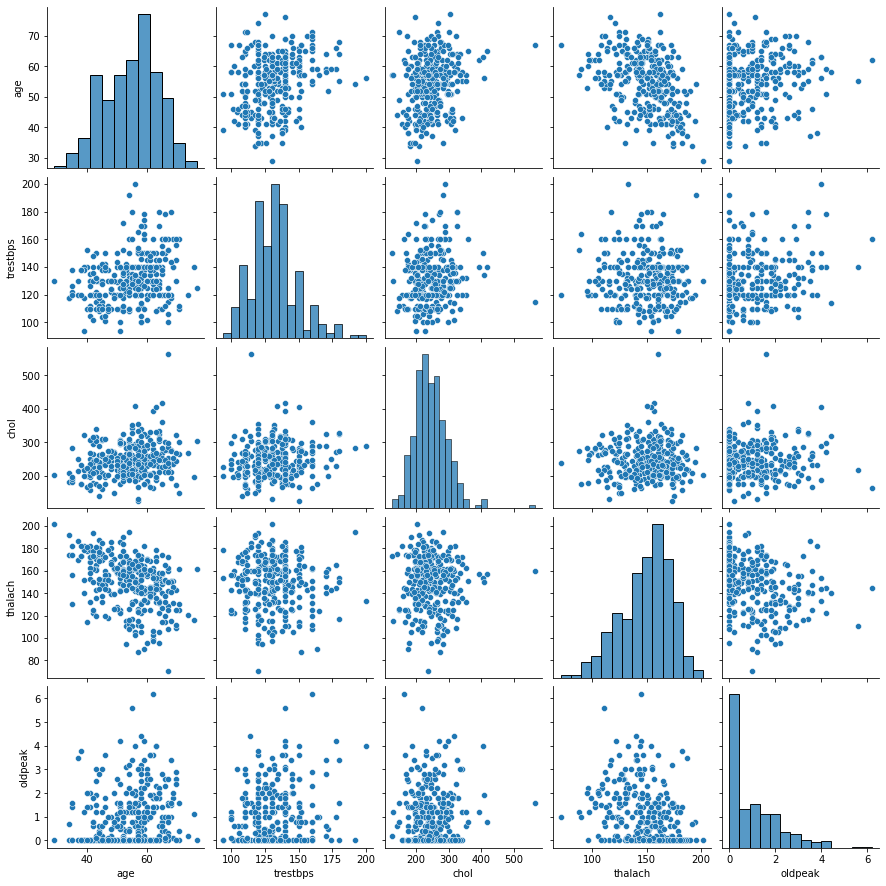

In [153]:
sns.pairplot(df[continous_cols])

Text(0.5, 1.0, 'Correlation of all features')

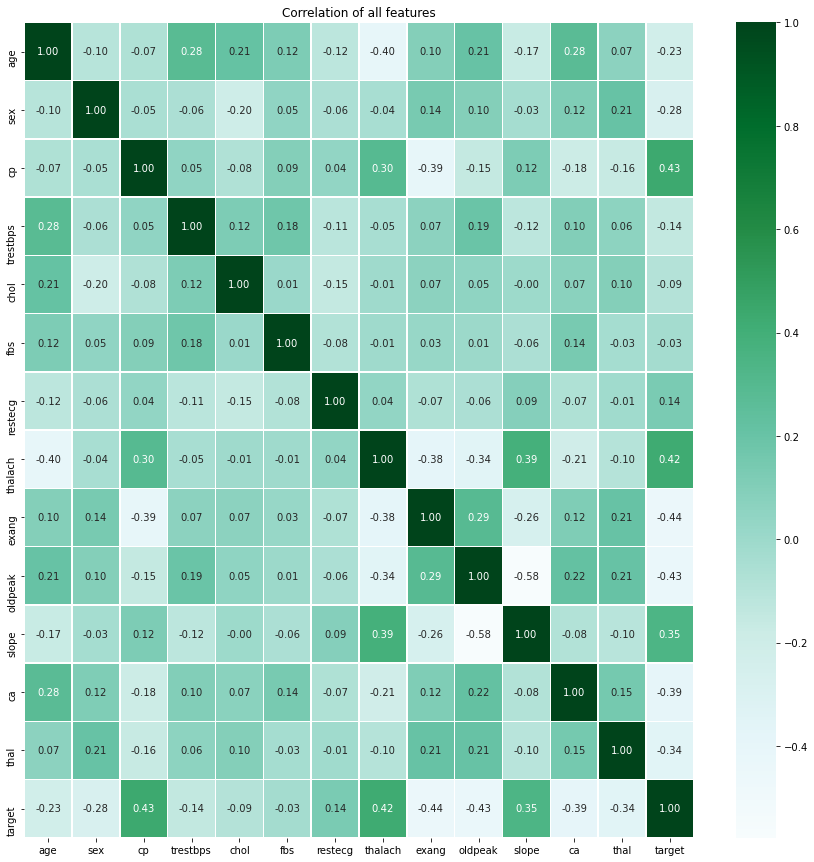

In [108]:
# Find the correlations between features using Heat Map!
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="BuGn")
ax.set_title('Correlation of all features')


fbs        0.03
chol       0.09
restecg    0.14
trestbps   0.14
age        0.23
sex        0.28
thal       0.34
slope      0.35
ca         0.39
thalach    0.42
oldpeak    0.43
cp         0.43
exang      0.44
dtype: float64

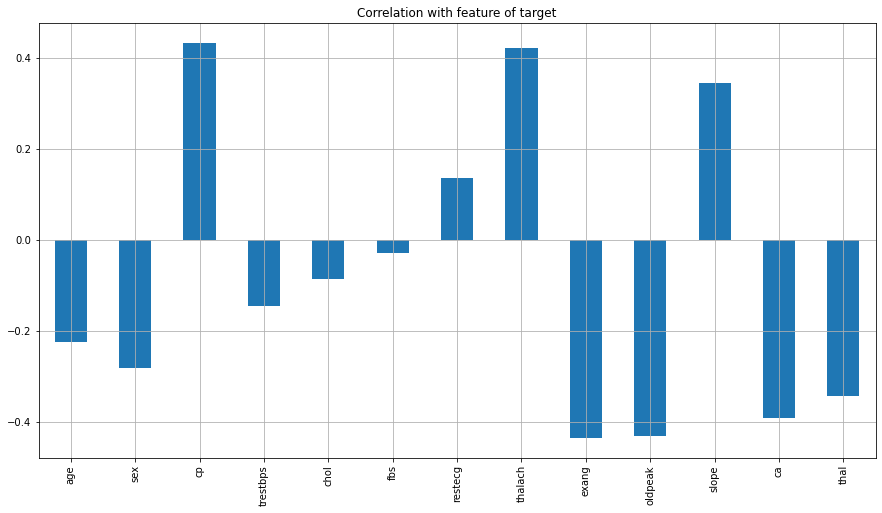

In [114]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(15, 8), 
                                                   title="Correlation with feature of target")

df.drop('target', axis=1).corrwith(df.target).abs().sort_values()

Some interesting finding are listed below:
- The five strongest feature affect the Target feature: 'ca', 'thalach','oldpeak','cp','exang'
- Positive correlation with Target are 'cp','restecg','thalach','slope' while the remain are negative correlation.

In [161]:
# Categorical and Numerical Continious Features 
categorical_cols = []
continous_cols = []
for column in df.columns:
    print('\n')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_cols.append(column)
    else:
        continous_cols.append(column)



age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex : [1 0]


cp : [3 2 1 0]


trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 

In [128]:
print('The categorical columns: ',f"{categorical_cols}")
print('The continuous columns: ',f"{continous_cols}")

The categorical columns:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
The continuous columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [162]:
# Encoding categorical feature using get_dummies() after create a copy of df as df2

categorical_cols.remove('target')

df2 = df.copy()
df2 = pd.get_dummies(df2, columns = categorical_cols)

# Scaling numeric features using StandardScaler()

sc = StandardScaler()
continous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df2[continous_cols] = sc.fit_transform(df2[continous_cols])

In [163]:
df2

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.08,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.93,-0.09,0.07,1.64,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.49,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.17,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.59,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0.48,-0.11,-1.16,-0.73,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.04,-1.23,0.34,-0.77,0.14,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.50,0.71,-1.04,-0.37,2.03,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.29,-0.09,-2.24,-1.51,0.14,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


# Part 2: Modelling

# Logistic Regression

In [132]:
# Take the feature columns
feature_cols = [col for col in df2.columns if col != 'target']

# Take the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=99)

train_idx, test_idx = next(strat_shuf_split.split(df2[feature_cols], df2.target))
# Create the dataframe for X_train, X_test,y_train, y_test
X_train = df2.loc[train_idx, feature_cols]
y_train = df2.loc[train_idx, 'target']

X_test  = df2.loc[test_idx, feature_cols]
y_test  = df2.loc[test_idx, 'target']

In [135]:
### BEGIN SOLUTION

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)

clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.83,0.80,0.81,0.82,0.82
recall,0.73,0.88,0.81,0.81,0.81
f1-score,0.78,0.84,0.81,0.81,0.81
support,41.00,50.00,0.81,91.00,91.00


In [141]:
from sklearn.linear_model import LogisticRegressionCV

# Use LogisticRegressionCV with L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.82,0.81,0.81,0.81,0.81
recall,0.76,0.86,0.81,0.81,0.81
f1-score,0.78,0.83,0.81,0.81,0.81
support,41.00,50.00,0.81,91.00,91.00


In [140]:
# Use LogisticRegressionCV with L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.83,0.80,0.81,0.82,0.82
recall,0.73,0.88,0.81,0.81,0.81
f1-score,0.78,0.84,0.81,0.81,0.81
support,41.00,50.00,0.81,91.00,91.00


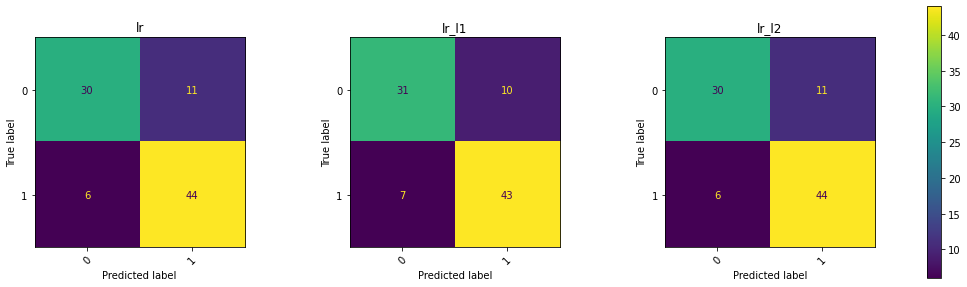

In [142]:
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

In term of Logistic regression, I choose model Logistic Regression without regularization since it has high accuracy score and less number of False Negative than lr_L1 and simpler than lr_L2

# KNN Algorithm

In [45]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K            25.00
Error Rate    0.16
Name: 24, dtype: float64

In [145]:
# After determining the minimum error k = id = 25, try to find y_pred and classification report
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.87,0.75,0.79,0.81,0.80
recall,0.63,0.92,0.79,0.78,0.79
f1-score,0.73,0.83,0.79,0.78,0.79
support,41.00,50.00,0.79,91.00,91.00


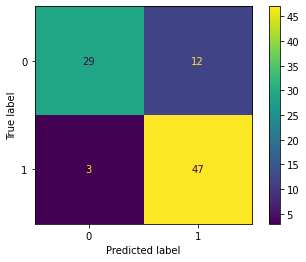

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

# XGBoost Algorthim

In [48]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [147]:
# Assume some parameters for the XGBClassfier instance

param_grid = {
    "max_depth": [5],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [148]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 10,
 'subsample': 0.3}

In [149]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.85,0.72,0.76,0.79,0.78
recall,0.56,0.92,0.76,0.74,0.76
f1-score,0.68,0.81,0.76,0.74,0.75
support,41.00,50.00,0.76,91.00,91.00


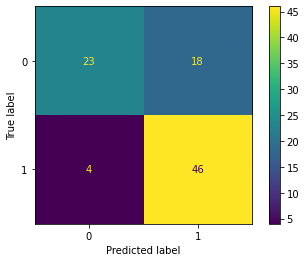

In [150]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

# SVC Algorthim

In [146]:
# Assume some parameter for SVM instance

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.80,0.77,0.78,0.78,0.78
recall,0.68,0.86,0.78,0.77,0.78
f1-score,0.74,0.81,0.78,0.77,0.78
support,41.00,50.00,0.78,91.00,91.00


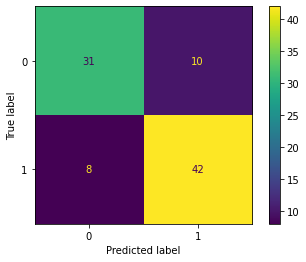

In [57]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()